In [2]:
import os
import random

import numpy as np
import torch
from skimage.io import imread
from torch.utils.data import Dataset
import tqdm
import matplotlib.pyplot as plt

from utils import crop_sample, pad_sample, resize_sample, normalize_volume, gray2rgb, log_images

Let's find images with abnormalities!

In [6]:
images_with_abnormalities = []
masks_with_abnormalities = []
for i in range(1, 24):
    mask = imread(f'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_{i}_mask.tif')
    image = imread(f'lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_{i}.tif')
    if mask.sum() > 0:  # Check if there is some segment in mask
        images_with_abnormalities.append(image)
        masks_with_abnormalities.append(mask)


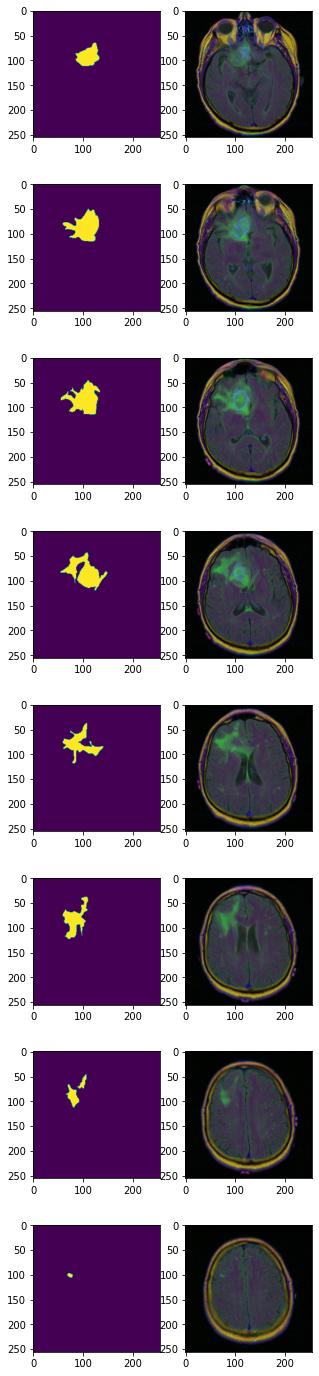

In [3]:
max_plots = 10
fig, ax = plt.subplots(len(images_with_abnormalities[:max_plots]), 2, figsize=(5, 25))

for idx, (mask, image) in enumerate(zip(masks_with_abnormalities[:max_plots], images_with_abnormalities[:max_plots])):
    ax[idx, 0].imshow(mask)
    ax[idx, 1].imshow(image)

Print `mask` on original image as an outline

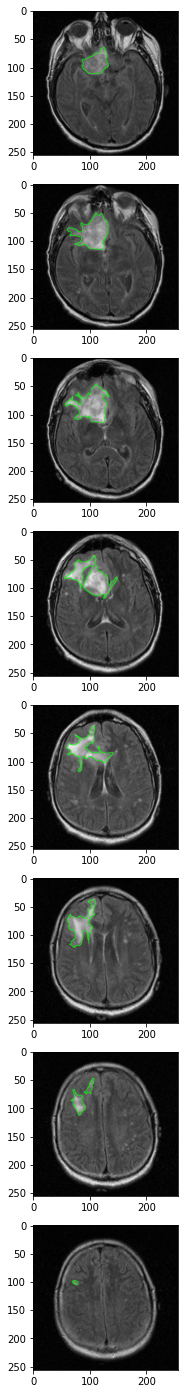

In [7]:
_, ax = plt.subplots(len(images_with_abnormalities[:max_plots]), 1,  figsize=(5, 25))

for idx, (im, mask) in enumerate(zip(images_with_abnormalities[:max_plots], masks_with_abnormalities[:max_plots])):
    im_t = torch.tensor(im)
    mask_t = torch.tensor(mask).unsqueeze(-1)
    # fix dimensions (C, H, W)
    im_t = im_t.permute(2, 0, 1)
    mask_t = mask_t.permute(2, 0, 1)
    im_t = im_t.unsqueeze(0)
    mask_t = mask_t.unsqueeze(0)

    im_t = im_t.to(torch.float)/255.
    mask_t = mask_t.to(torch.float)/255.
    outlined_img = log_images(im_t, mask_t, mask_t)

    ax[idx].imshow(outlined_img[0])
